In [1]:
import rasterio.mask
import fnmatch
import os
import fiona

file_path_input_shp_file = 'J:\\CSE books\\4-1\\Thesis\\shapefile'
#file_path_input = 'J:\\CSE books\\4-1\\Thesis\\testdata'
file_path_input = 'C:\\Users\\acer\\Desktop\\coor'

In [ ]:
src1 = rasterio.open('J:\\CSE books\\4-1\\Thesis\\chinanightCHN_\\Original_\\F182011.v4c_web.stable_lights.avg_vis.tif')
plt.imshow(src1.read(1), cmap='viridis')
plt.show()

In [ ]:
for file in os.listdir(file_path_input_shp_file):
    # Reads shape file
    if file.endswith('shp'):
        file_name = file[0:4]
        print(file_path_input_shp_file+"\\"+file)
        with fiona.open(file_path_input_shp_file+'\\'+file, "r") as shapefile:
            features = [feature["geometry"] for feature in shapefile]
            
        # Store output file
        file_path_output = 'C:\\Users\\acer\\Desktop\\coor\\'+file_name+'\\Original'
        if not os.path.exists(file_path_output):
            os.makedirs(file_path_output)

        # Read all the images, filter out by .tif extension
        for file in os.listdir(file_path_input):
            if (file.endswith(".tif")==False):
                continue
            print(file)
            with rasterio.open(file_path_input+"\\"+file) as src:
                out_image, out_transform = rasterio.mask.mask(src, features, crop=True)
                out_meta = src.meta.copy()

            out_meta.update({"driver": "GTiff",
                            "height": out_image.shape[1],
                            "width": out_image.shape[2],
                            "transform": out_transform})

        # Write images by shape file
            with rasterio.open(file_path_output+"\\"+file, "w", **out_meta) as dest:
                dest.write(out_image)

In [ ]:
file_path_output

In [ ]:
import matplotlib.pyplot as plt
import gdal
import numpy as np

In [ ]:
def read_img(path):
    ds = gdal.Open(path)
    img = np.array(ds.GetRasterBand(1).ReadAsArray())
    #print(img.dtype)
    return img

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import gdal
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

In [ ]:
dirpath = r'C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original'
outpath = r'C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\\composite'


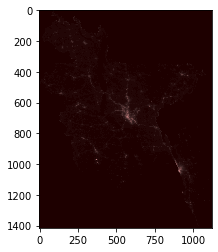

In [5]:
src1 = rasterio.open('J:\\CSE books\\4-1\\Thesis\\out\\BGD_\\Original\\SVDNB_npp_20190401-20190430_75N060E_vcmslcfg_v10_c201905191000.avg_rade9h.tif')
plt.imshow(src1.read(1), cmap='pink')
plt.show()

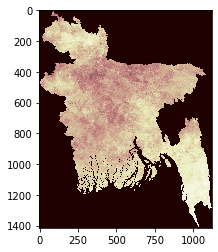

In [6]:
src1 = rasterio.open('J:\\CSE books\\4-1\\Thesis\\out\\BGD_\\Original\\SVDNB_npp_20190401-20190430_75N060E_vcmslcfg_v10_c201905191000.cf_cvg(1).tif')
plt.imshow(src1.read(1), cmap='pink')
plt.show()

In [52]:
import subprocess
import gdal
import sys


def gdalwarp(*args):
    return subprocess.check_call(['gdalwarp'] + list(args))


src_path = 'J:\\CSE books\\4-1\\Thesis\\out\\BGD_\\latest\\SVDNB_npp_20190401-20190430_75N060E_vcmslcfg_v10_c201905191000.avg_rade9h.tif'
ds = gdal.Open(src_path)

try:
    out_base = 'J:\\CSE books\\4-1\\Thesis\\out\\BGD_\\latest'
except IndexError:
    out_base = '\\tmp\\test_'

gt = ds.GetGeoTransform()

width_px = ds.RasterXSize
height_px = ds.RasterYSize

# Get coords for lower left corner
xmin = int(gt[0])
xmax = int(gt[0] + (gt[1] * width_px))

# get coords for upper right corner
if gt[5] > 0:
    ymin = int(gt[3] - (gt[5] * height_px))
else:
    ymin = int(gt[3] + (gt[5] * height_px))

ymax = int(gt[3])

# split height and width into four - i.e. this will produce 25 tiles
tile_width = (xmax - xmin) // 4
tile_height = (ymax - ymin) // 4

for x in range(xmin, xmax, tile_width):
    for y in range(ymin, ymax, tile_height):
        gdalwarp('-te', str(x), str(y), str(x + tile_width),
                 str(y + tile_height), '-multi', '-wo', 'NUM_THREADS=ALL_CPUS',
                 '-wm', '500', src_path, out_base + '{}_{}.tif'.format(x, y))